
Dataset 1: dataset_1.csv


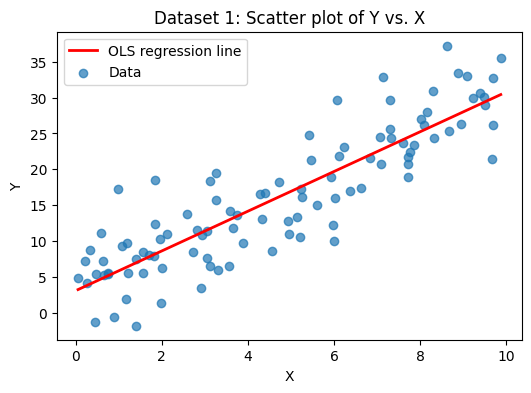

<Figure size 600x600 with 0 Axes>

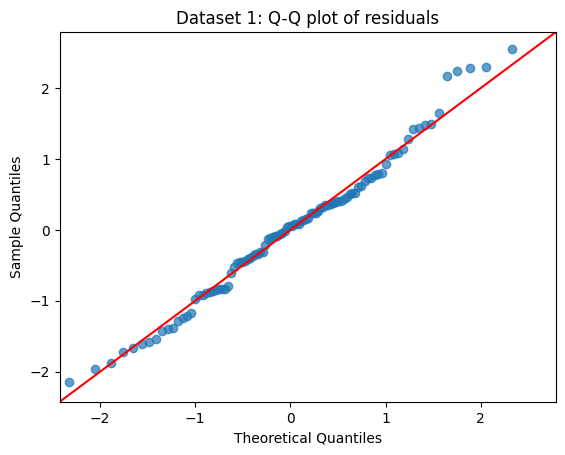

Shapiro-Wilk test p-value: 0.2984
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [1.4083, 4.6778]
95% CI for slope:     [2.4785, 3.0598]
Conclusion: Statistically significant association detected.

Dataset 2: dataset_2.csv


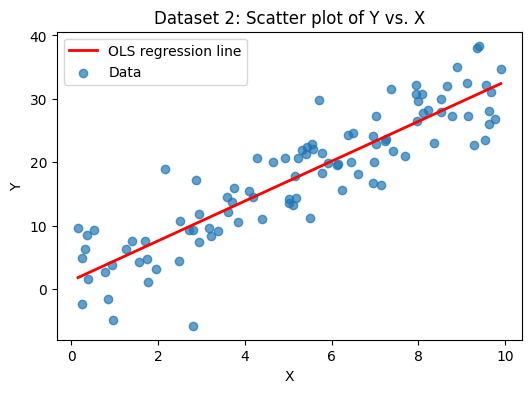

<Figure size 600x600 with 0 Axes>

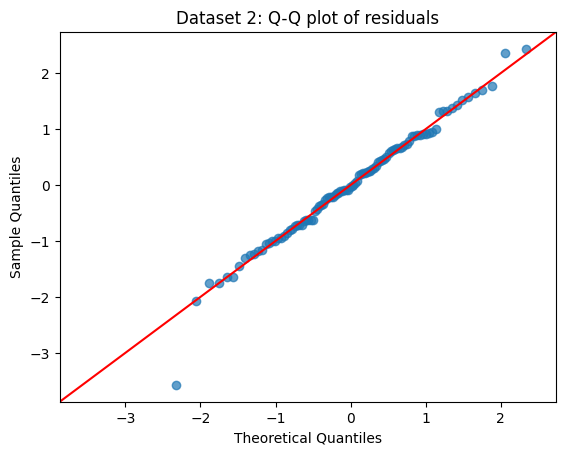

Shapiro-Wilk test p-value: 0.5030
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [-0.6491, 3.4945]
95% CI for slope:     [2.8005, 3.4619]
Conclusion: Statistically significant association detected.

Dataset 3: dataset_3.csv


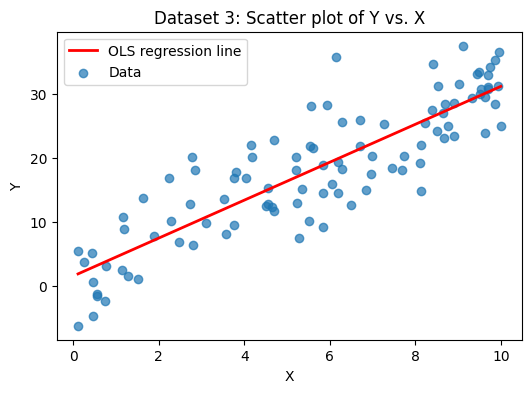

<Figure size 600x600 with 0 Axes>

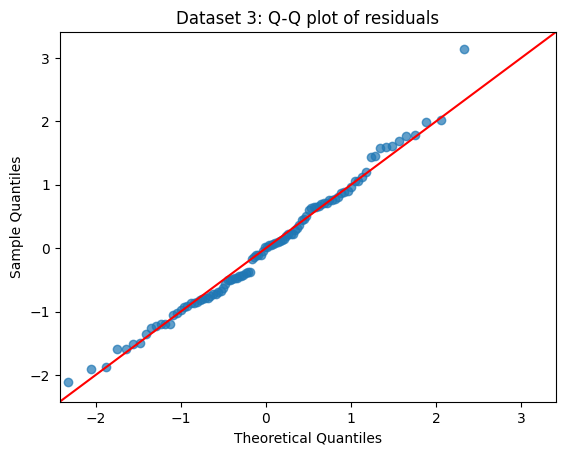

Shapiro-Wilk test p-value: 0.4503
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [-0.2757, 3.8526]
95% CI for slope:     [2.6516, 3.2401]
Conclusion: Statistically significant association detected.

Dataset 4: dataset_4.csv


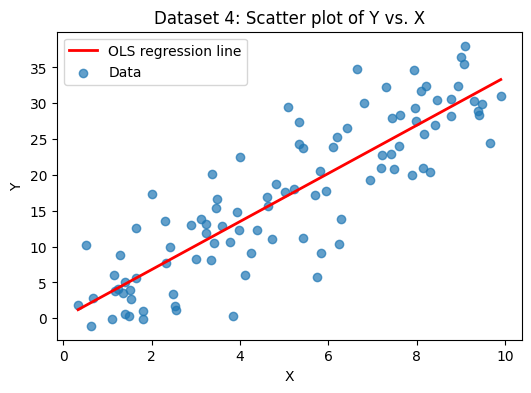

<Figure size 600x600 with 0 Axes>

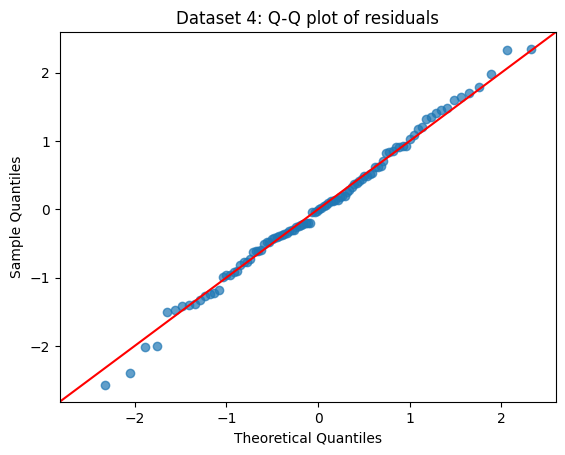

Shapiro-Wilk test p-value: 0.9457
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [-1.8371, 1.8168]
95% CI for slope:     [3.0427, 3.6658]
Conclusion: Statistically significant association detected.

Dataset 5: dataset_5.csv


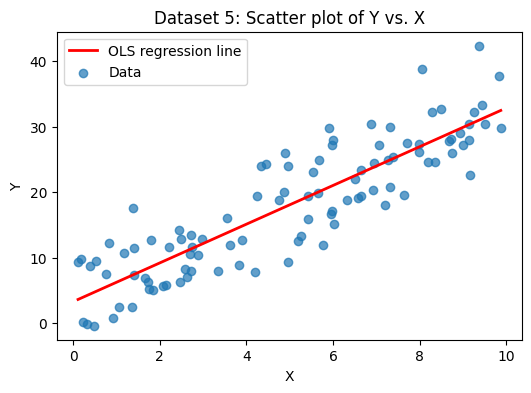

<Figure size 600x600 with 0 Axes>

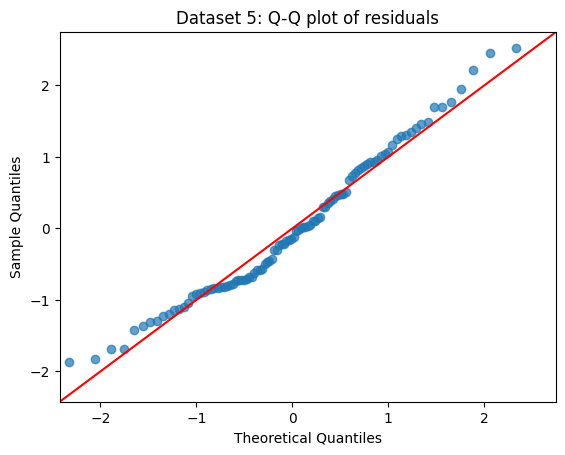

Shapiro-Wilk test p-value: 0.0361
Residuals fail normality test. So, poor fit, no further inference.

Dataset 6: dataset_6.csv


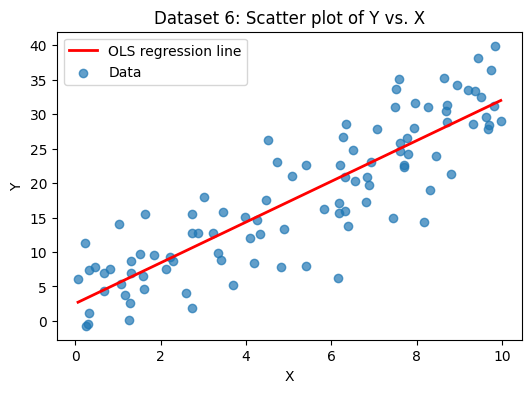

<Figure size 600x600 with 0 Axes>

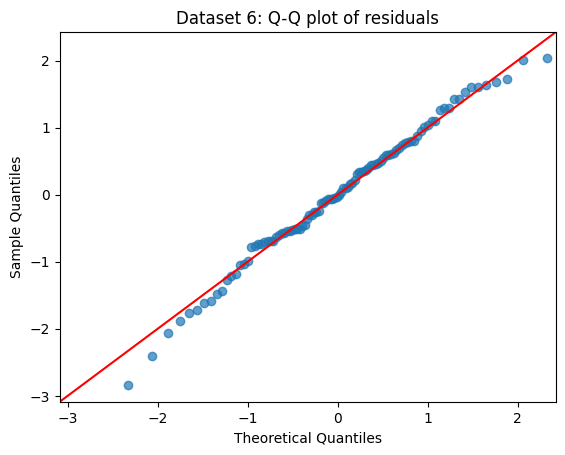

Shapiro-Wilk test p-value: 0.6334
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [0.8843, 4.1303]
95% CI for slope:     [2.6489, 3.2203]
Conclusion: Statistically significant association detected.

Dataset 7: dataset_7.csv


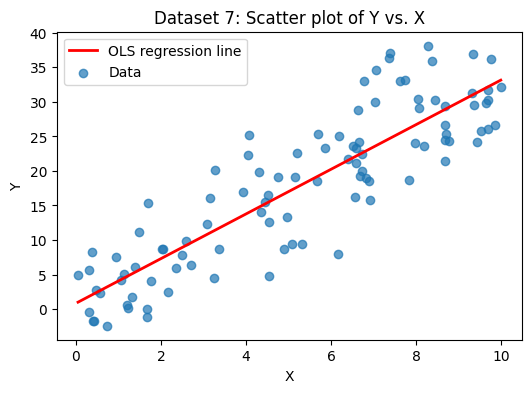

<Figure size 600x600 with 0 Axes>

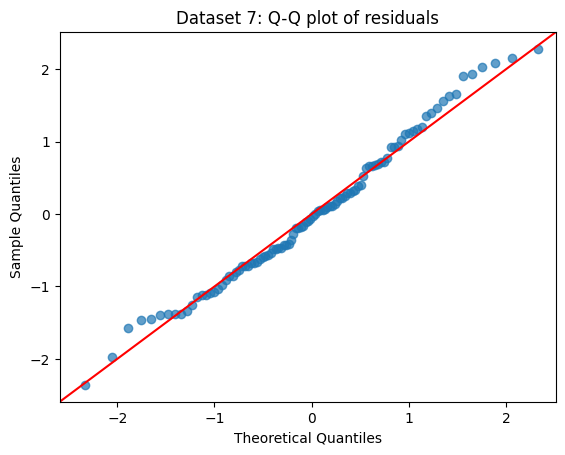

Shapiro-Wilk test p-value: 0.2634
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [-0.9305, 2.5779]
95% CI for slope:     [2.9237, 3.5701]
Conclusion: Statistically significant association detected.

Dataset 8: dataset_8.csv


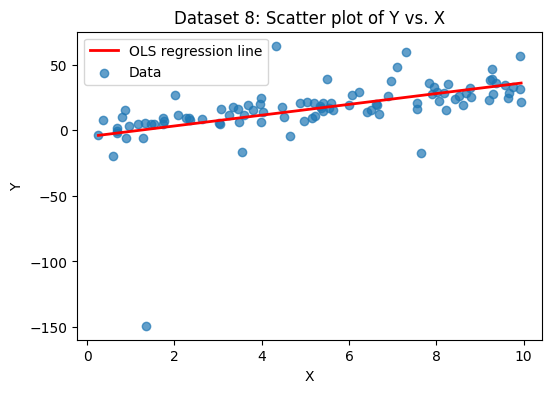

<Figure size 600x600 with 0 Axes>

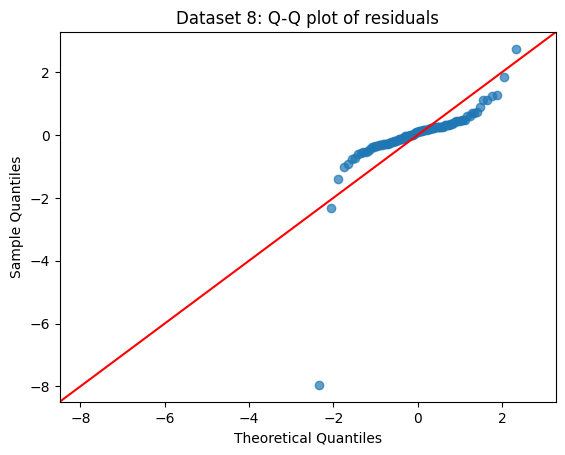

Shapiro-Wilk test p-value: 0.0000
Residuals fail normality test. So, poor fit, no further inference.

Dataset 9: dataset_9.csv


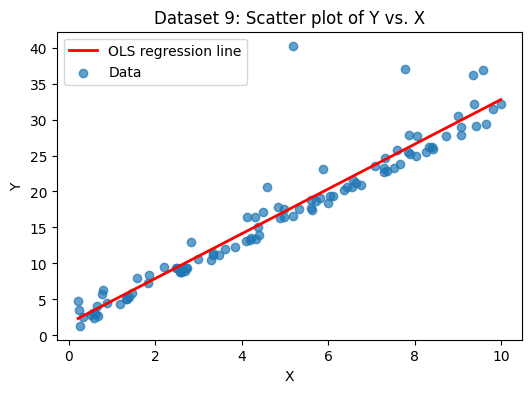

<Figure size 600x600 with 0 Axes>

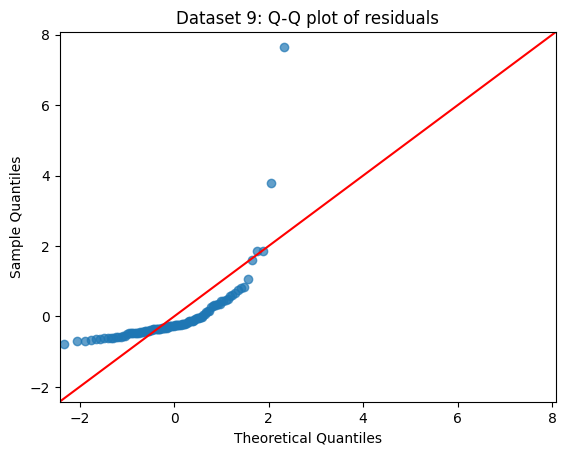

Shapiro-Wilk test p-value: 0.0000
Residuals fail normality test. So, poor fit, no further inference.

Dataset 10: dataset_10.csv


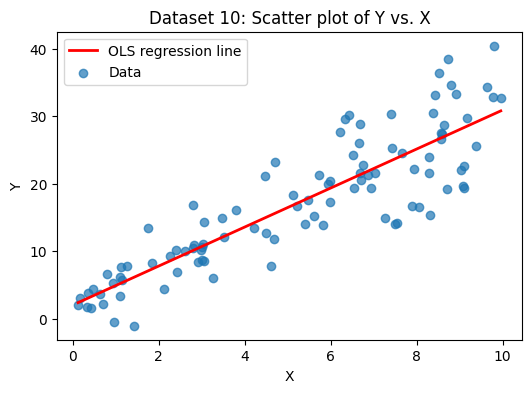

<Figure size 600x600 with 0 Axes>

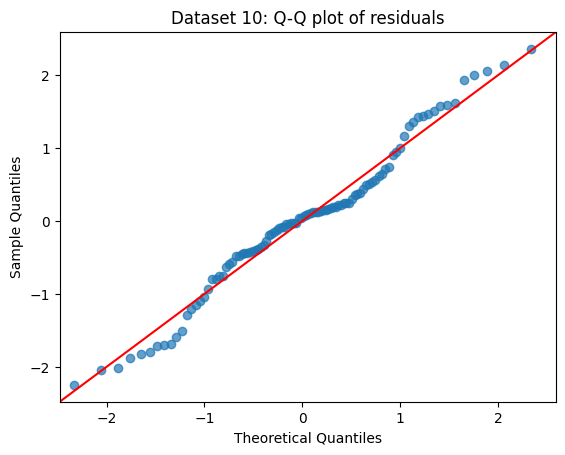

Shapiro-Wilk test p-value: 0.0660
Residuals pass normality test. So, proceed to bootstrap CIs.
95% CI for intercept: [0.6551, 3.3255]
95% CI for slope:     [2.5629, 3.1928]
Conclusion: Statistically significant association detected.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro

def analyze_dataset(i):
    filename = f'dataset_{i}.csv'
    print(f"\nDataset {i}: {filename}")

    df = pd.read_csv(filename)
    X = df['X']
    Y = df['Y']

    plt.figure(figsize=(6,4))
    plt.scatter(X, Y, alpha=0.7, label='Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Dataset {i}: Scatter plot of Y vs. X')

    X_const = sm.add_constant(X)
    model = sm.OLS(Y, X_const).fit()
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = model.params['const'] + model.params['X'] * x_vals
    plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS regression line')
    plt.legend()
    plt.show()

    residuals = model.resid
    plt.figure(figsize=(6,6))
    sm.qqplot(residuals, line='45', fit=True, alpha=0.7)
    plt.title(f'Dataset {i}: Q-Q plot of residuals')
    plt.show()

    stat, pval = shapiro(residuals)
    print(f"Shapiro-Wilk test p-value: {pval:.4f}")
    if pval < 0.05:
        print("Residuals fail normality test. So, poor fit, no further inference.")
        return  
    print("Residuals pass normality test. So, proceed to bootstrap CIs.")

    n = len(df)
    n_boot = 1000
    boot_params = np.zeros((n_boot, 2)) 
    for b in range(n_boot):
        sample_idx = np.random.choice(df.index, size=n, replace=True)
        Xb = sm.add_constant(df.loc[sample_idx, 'X'])
        yb = df.loc[sample_idx, 'Y']
        boot_model = sm.OLS(yb, Xb).fit()
        boot_params[b] = boot_model.params.values

    ci_intercept = np.percentile(boot_params[:,0], [2.5, 97.5])
    ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])
    print(f"95% CI for intercept: [{ci_intercept[0]:.4f}, {ci_intercept[1]:.4f}]")
    print(f"95% CI for slope:     [{ci_slope[0]:.4f}, {ci_slope[1]:.4f}]")

    if ci_slope[0] > 0 or ci_slope[1] < 0:
        print("Conclusion: Statistically significant association detected.")
    else:
        print("Conclusion: No statistically significant association detected.")

for i in range(1, 11):
    analyze_dataset(i)
